In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.core import Dense, Activation
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider, Label

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='anadekonda', api_key='gk66kZB2qCbZeIIBVa4T')

In [72]:
labs = ["B.Eryt..1341.","B.Gluk..1462.","B.HKR..1358.","B.Hb..1552.","B.Hb.CO..1566.","B.HbA1c..6128.","B.Leuk..2218.","B.Trom..2791.","E.MCH..1558.","E.MCV..1357.","P.GT..4597.","P.Gluk..1471.","fP.Gluk..1468."]

In [73]:
df = pd.read_csv('patient_profile_aod.csv', sep=',').iloc[:,22:]

In [38]:
df.head()

,B.Eryt..1341.,B.Gluk..1462.,B.HKR..1358.,B.Hb..1552.,B.Hb.CO..1566.,B.HbA1c..6128.,B.Leuk..2218.,B.Trom..2791.,E.MCH..1558.,E.MCV..1357.,P.GT..4597.,P.Gluk..1471.,fP.Gluk..1468.,age_of_death
0,3.746429,7.800000,0.357222,123.785714,0.666667,53.549999,7.160000,210.260870,29.750000,91.000000,20.000000,9.433333,5.250000,0.0
1,3.883813,7.689041,0.362326,117.962838,1.195588,54.938888,7.807843,234.922297,30.008357,90.592705,32.916667,8.816364,7.019149,0.0
2,3.817660,7.800000,0.362881,122.941176,0.642857,53.549999,7.678261,211.081081,29.827586,90.446809,24.666667,7.770000,8.433333,0.0
3,3.829167,13.100000,0.364545,116.578947,1.133333,53.549999,7.800000,206.700000,30.777778,90.000000,35.000000,6.775000,6.600000,0.0
4,3.945000,8.833333,0.368889,109.625000,0.775000,41.000000,6.953846,237.555556,29.857143,92.125000,46.000000,9.333333,7.185714,0.0


In [80]:
low = .01
high = .99
quant_df = df.quantile([low, high])

df = df.apply(lambda x: x[(x>quant_df.loc[low, x.name]) & 
                                    (x < quant_df.loc[high, x.name])], axis=0)
df.dropna(inplace=True)

,B.Eryt..1341.,B.Gluk..1462.,B.HKR..1358.,B.Hb..1552.,B.Hb.CO..1566.,B.HbA1c..6128.,B.Leuk..2218.,B.Trom..2791.,E.MCH..1558.,E.MCV..1357.,P.GT..4597.,P.Gluk..1471.,fP.Gluk..1468.,age_of_death
7,3.792727,6.557143,0.356316,118.512821,1.080000,53.000000,9.241176,244.166667,30.027027,89.595238,35.0,8.325000,5.400000,89.567123
19,3.912000,6.742857,0.349200,119.729730,1.230000,40.000000,8.079412,213.857143,29.653061,92.075000,40.0,11.858334,8.228571,67.591781
20,4.103333,8.300000,0.367500,125.250000,1.088889,53.000000,9.950000,186.600000,31.000000,92.500000,35.0,10.600000,7.185714,89.698630
23,3.720000,7.500000,0.383333,110.600000,0.900000,53.549999,9.266667,214.800000,30.545455,89.700000,35.0,7.800000,7.185714,89.134247
33,3.882553,7.212500,0.368214,120.434783,1.100000,39.233334,8.717021,225.255319,30.164557,90.462963,23.0,7.737500,7.566667,77.580822


In [82]:
# Load target data from glucose
y = df['age_of_death'].as_matrix()
x = df[labs].as_matrix()

In [83]:
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')
    return model

In [84]:
batch_size = 10
nb_epoch = 100
model = build_model()
model.fit(x,
          y,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_split = 0.1)

Train on 2084 samples, validate on 232 samples
Epoch 1/100
2084/2084 [==============================] - 1s 305us/step - loss: 1583.8576 - acc: 0.0000e+00 - val_loss: 110.7181 - val_acc: 0.0000e+00
Epoch 2/100
2084/2084 [==============================] - 0s 128us/step - loss: 102.6796 - acc: 0.0000e+00 - val_loss: 109.8466 - val_acc: 0.0000e+00
Epoch 3/100
2084/2084 [==============================] - 0s 118us/step - loss: 102.0544 - acc: 0.0000e+00 - val_loss: 109.3304 - val_acc: 0.0000e+00
Epoch 4/100
2084/2084 [==============================] - 0s 118us/step - loss: 100.8556 - acc: 0.0000e+00 - val_loss: 108.8026 - val_acc: 0.0000e+00
Epoch 5/100
2084/2084 [==============================] - 0s 120us/step - loss: 100.0626 - acc: 0.0000e+00 - val_loss: 107.9749 - val_acc: 0.0000e+00
Epoch 6/100
2084/2084 [==============================] - 0s 128us/step - loss: 98.8640 - acc: 0.0000e+00 - val_loss: 107.1953 - val_acc: 0.0000e+00
Epoch 7/100
2084/2084 [==============================] - 0s

In [85]:
x_s = scale(x)
pca = PCA(n_components = 2)
pca.fit(x_s)
x_pca = pca.transform(x_s)

In [86]:
def f(var1,
      var2,
      var3,
      var4,
      var5,
      var6,
      var7,
      var8,
      var9,
      var10,
      var11,
      var12,
      var13):
    array = np.array([[var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13]])
    print("Life Expetancy: {0:.2f} years".format(model.predict(array)[0][0]))
    
    full = np.vstack((x,array))
    full_pca = pca.transform(scale(full))
    
    
    plt.figure(figsize=(10,10))
    plt.scatter(full_pca[:-1,0], full_pca[:-1,1])
    plt.scatter(full_pca[-1,0], full_pca[-1,1], color='red')
    plt.show()
    
    
    
    #return model.predict(array)[0][0]

Life Expetancy: 80.35 years


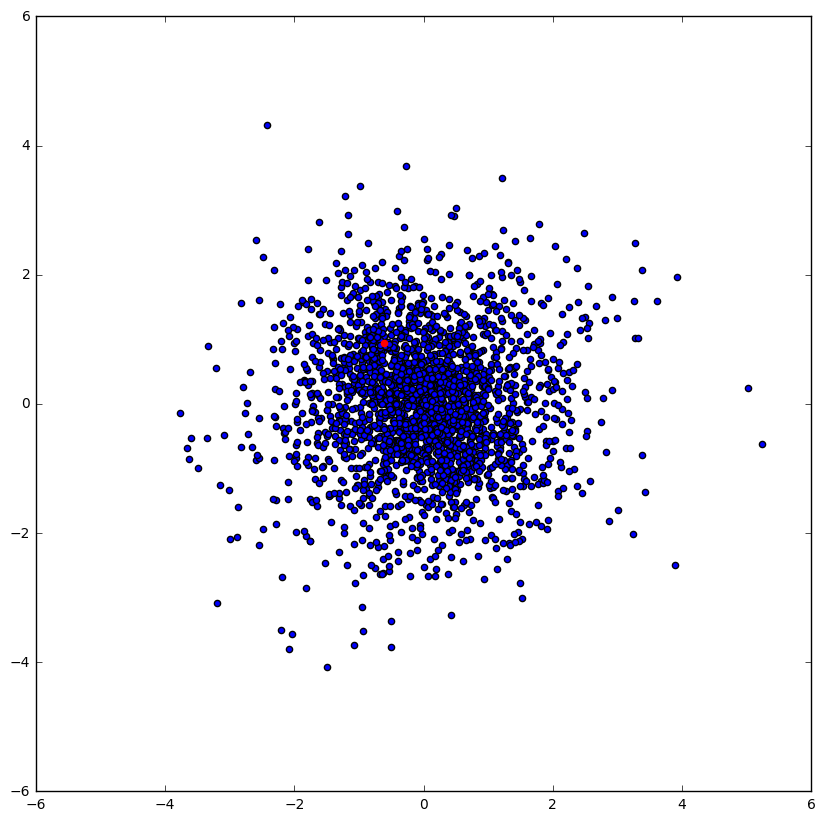

In [87]:
interact_manual(f, var1=widgets.FloatSlider(value=3.947811, min=2.63, max=5.930000, description='B-Eryt'),
         var2=widgets.FloatSlider(value=8.221790, min=2.4, max=31.000000, description='B-Gluk'),
         var3=widgets.FloatSlider(value=0.363096, min=0.22, max=0.490000, description='B-HKR'),
         var4=widgets.FloatSlider(value=119.174496,min=60, max=162.000000,description='B-Hb'),
         var5=widgets.FloatSlider(value=1.097940,min=0, max=4.4,description='B-Hb-CO'),
         var6=widgets.FloatSlider(value=54.047500,min=23, max=103,description='B-HbA1-c'),
         var7=widgets.FloatSlider(value=8.163574, min=1.1, max=18,description='B-Leuk'),
         var8=widgets.FloatSlider(value=230.610433, min=7, max=562, description='B-Trom'),
         var9=widgets.FloatSlider(value=30.028970,min=22, max=39, description='E-MCH'),
         var10=widgets.FloatSlider(value=90.696668,min=66, max=113, description='E-MCV'),
         var11=widgets.FloatSlider(value=39.583638,min=8, max=2400,description='P-GT'),
         var12=widgets.FloatSlider(value=8.533187,min=2.7, max=24,description='P-Gluk'),
         var13=widgets.FloatSlider(value=7.359861,min=4.5,max=18.3,description='fP-Gluk'));